In [1]:
# IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import urduhack
urduhack.download()
from urduhack.normalization import normalize
from urduhack.preprocessing import normalize_whitespace, remove_punctuation, remove_accents, replace_urls, replace_emails, replace_numbers, replace_currency_symbols, remove_english_alphabets
from urduhack.models.lemmatizer import lemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns
# from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix, classification_report


In [2]:
#Importing dataset 
data = pd.read_csv('EMOTION_RECOGNITION.csv')
data.head()


,LABELS,NEWS
0,NEGATIVE,کرونا وائرس کن طبی پیچیدگیوں کا سبب بن سکتا ہے؟
1,NEUTRAL,کووڈ 19 کی نشانیاں اس ترتیب سے ظاہر ہوسکتی ہیں
2,NEGATIVE,کرونا کی نئی اور شدید قسم ایک اور ملک پہنچ گئی
3,NEUTRAL,نمونیا کیا ہے ؟ بیماری کی علامات اورعلاج
4,POSITIVE,کرونا ویکسین، ترکی اہم کامیابی حاصل کرنے کے قریب


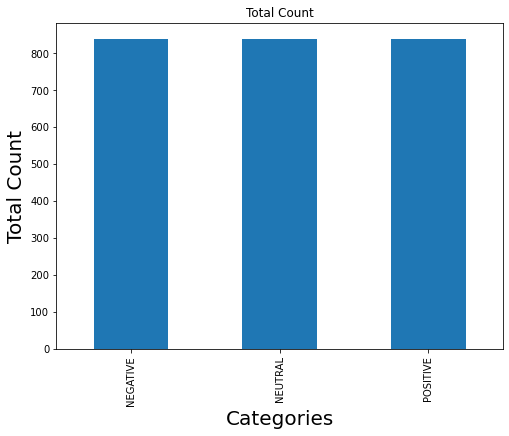

In [3]:
category_id_df = data[['NEWS', 'LABELS']].drop_duplicates().sort_values('LABELS')
category_id_df.groupby('LABELS').count()
category_id_df.head()

import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize=(8,6))
category_id_df.groupby('LABELS').NEWS.count().plot.bar(ylim=0)
#plt.show()

#data_count = df1.groupby('Type').count()
#plt.bar(data_count.index.values, data_count['Descrption'])
plt.title("Total Count")
plt.xlabel('Categories', fontsize=20)
plt.ylabel('Total Count', fontsize=20)
plt.show()

In [4]:
# Make Copy of dataset so we dont have to load again and again
# Make copy of a dataset
df =  data.copy()
df

,LABELS,NEWS
0,NEGATIVE,کرونا وائرس کن طبی پیچیدگیوں کا سبب بن سکتا ہے؟
1,NEUTRAL,کووڈ 19 کی نشانیاں اس ترتیب سے ظاہر ہوسکتی ہیں
2,NEGATIVE,کرونا کی نئی اور شدید قسم ایک اور ملک پہنچ گئی
3,NEUTRAL,نمونیا کیا ہے ؟ بیماری کی علامات اورعلاج
4,POSITIVE,کرونا ویکسین، ترکی اہم کامیابی حاصل کرنے کے قریب
...,...,...
2545,POSITIVE,سندھی کلچرل ڈے: امریکی قونصل جنرل کی سندھی زبا...
2546,POSITIVE,سابق برطانوی فٹ بالر کامیاب جوان اسپورٹس ڈرائی...
2547,POSITIVE,کراچی کے لئے بڑی خوشخبری، اسد عمر نے بڑا اعلان...
2548,POSITIVE,نشتر میڈیکل یونیورسٹی میں سولر پاور منصوبے کا ...


In [5]:
NEWS = df['NEWS']
LABELS = df['LABELS']

In [6]:
# checking anything is null
df.isnull().sum()

LABELS    0
NEWS      0
dtype: int64

In [7]:
# Associate Category names with numerical index and save it in new column category_id
encoded_sentiments=df['encoded_sentiments'] = df['LABELS'].factorize()[0]
encoded_sentiments

# category_id = review_df.CLASS.factorize()
# category_id
# View first 10 entries of category_id, as a sanity check
df['encoded_sentiments'][0:10]
encoded_sentiments = df.LABELS.factorize()
print(encoded_sentiments)
encoded_sentiments = np.array(encoded_sentiments)

# print()
# # np.array(sentiment_label)
print(type(encoded_sentiments))

(array([0, 1, 0, ..., 2, 2, 1], dtype=int64), Index(['NEGATIVE', 'NEUTRAL', 'POSITIVE'], dtype='object'))
<class 'numpy.ndarray'>


In [8]:
category_id_df = df[['LABELS', 'encoded_sentiments']].drop_duplicates().sort_values('encoded_sentiments')
category_id_df

,LABELS,encoded_sentiments
0,NEGATIVE,0
1,NEUTRAL,1
4,POSITIVE,2


In [9]:
df.sample(5, random_state=0)

,LABELS,NEWS,encoded_sentiments
558,NEUTRAL,کورونا سے صحتیاب افراد سے متعلق اہم انکشاف,1
390,POSITIVE,مولی کے بیج سے گردے کی پتھری کا علاج,2
666,NEGATIVE,کورونا وبا: ایک اور خطرناک اثر کا انکشاف,0
1264,POSITIVE,نومبر میں ٹیکسٹائل برآمدات میں ریکارڈ اضافہ,2
2293,POSITIVE,اماراتی کی ریاست ابوظبی میں الیکٹرک بس سروس کا...,2


In [10]:
df['encoded_sentiments'].value_counts()


0    850
1    850
2    850
Name: encoded_sentiments, dtype: int64

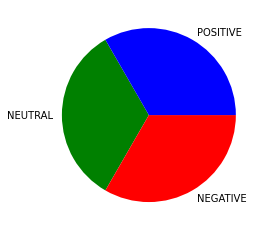

In [11]:
#### PIE CHART
A= [850,850,850]
LABEL = ["NEUTRAL","NEGATIVE","POSITIVE"]
COLS = ["GREEN","RED","BLUE"]
plt.pie(A,labels = LABEL,colors = COLS,startangle = 120,explode = (0,0,0))
plt.show()

In [12]:
# Apply urduhack preprocessing
# Now we will apply text cleaning modules from Urdu Hack Library

df['NEWS'] = df['NEWS'].apply(normalize) # To normalize some text, all you need to do pass unicode text. It will return a str with normalized characters both single and combined, proper spaces after digits and punctuations and diacritics(Zabar - Paish) removed.
# df['review'] = df['review'].apply(remove_punctuation) # Remove punctuation from text by removing all instances of marks. marks=',;:'
df['NEWS'] = df['NEWS'].apply(remove_accents) # Remove accents from any accented unicode characters in text str, either by transforming them into ascii equivalents or removing them entirely.
df['NEWS'] = df['NEWS'].apply(replace_urls) # Replace all URLs in text str with replace_with str.
df['NEWS'] = df['NEWS'].apply(replace_emails) # Replace all emails in text str with replace_with str.
# df['review'] = df['review'].apply(replace_numbers) # Replace all numbers in text str with replace_with str.
df['NEWS'] = df['NEWS'].apply(replace_currency_symbols) # Replace all currency symbols in text str with string specified by replace_with str.
# df['review'] = df['review'].apply(remove_english_alphabets) # Removes English words and digits from a text
df['NEWS'] = df['NEWS'].apply(normalize_whitespace) ## Given text str, replace one or more spacings with a single space, and one or more linebreaks with a single newline. Also strip leading/trailing whitespace.


In [13]:
# Remove stop words from text
from typing import FrozenSet
# Urdu Language Stop words list
STOP_WORDS: FrozenSet[str] = frozenset("""
 آ آئی آئیں آئے آتا آتی آتے آس آمدید آنا آنسہ آنی آنے آپ آگے آہ آہا آیا اب ابھی ابے
 ارے اس اسکا اسکی اسکے اسی اسے اف افوہ البتہ الف ان اندر انکا انکی انکے انہوں انہی انہیں اوئے اور اوپر
 اوہو اپ اپنا اپنوں اپنی اپنے اپنےآپ اکثر اگر اگرچہ اہاہا ایسا ایسی ایسے ایک بائیں بار بارے بالکل باوجود باہر
 بج بجے بخیر بشرطیکہ بعد بعض بغیر بلکہ بن بنا بناؤ بند بڑی بھر بھریں بھی بہت بہتر تاکہ تاہم تب تجھ
 تجھی تجھے ترا تری تلک تم تمام تمہارا تمہاروں تمہاری تمہارے تمہیں تو تک تھا تھی تھیں تھے تیرا تیری تیرے
 جا جاؤ جائیں جائے جاتا جاتی جاتے جانی جانے جب جبکہ جدھر جس جسے جن جناب جنہوں جنہیں جو جہاں جی جیسا
 جیسوں جیسی جیسے حالانکہ حالاں حصہ حضرت خاطر خالی خواہ خوب خود دائیں درمیان دریں دو دوران دوسرا دوسروں دوسری دوں
 دکھائیں دی دیئے دیا دیتا دیتی دیتے دیر دینا دینی دینے دیکھو دیں دیے دے ذریعے رکھا رکھتا رکھتی رکھتے رکھنا رکھنی
 رکھنے رکھو رکھی رکھے رہ رہا رہتا رہتی رہتے رہنا رہنی رہنے رہو رہی رہیں رہے ساتھ سامنے ساڑھے سب سبھی
 سراسر سمیت سوا سوائے سکا سکتا سکتے سہ سہی سی سے شاید شکریہ صاحب صاحبہ صرف ضرور طرح طرف طور علاوہ عین
 فقط فلاں فی قبل قطا لئے لائی لائے لاتا لاتی لاتے لانا لانی لانے لایا لو لوجی لوگوں لگ لگا لگتا
 لگتی لگی لگیں لگے لہذا لی لیا لیتا لیتی لیتے لیکن لیں لیے لے ماسوا مت مجھ مجھی مجھے محترم محترمہ محض
 مرا مرحبا مری مرے مزید مس مسز مسٹر مطابق مل مکرمی مگر مگھر مہربانی میرا میروں میری میرے میں نا نزدیک
 نما نہ نہیں نیز نیچے نے و وار واسطے واقعی والا والوں والی والے واہ وجہ ورنہ وغیرہ ولے وگرنہ وہ وہاں
 وہی وہیں ویسا ویسے ویں پاس پایا پر پس پلیز پون پونی پونے پھر پہ پہلا پہلی پہلے پیر پیچھے چاہئے
 چاہتے چاہیئے چاہے چلا چلو چلیں چلے چناچہ چند چونکہ چکی چکیں چکے ڈالنا ڈالنی ڈالنے ڈالے کئے کا کاش کب کبھی
 کدھر کر کرتا کرتی کرتے کرم کرنا کرنے کرو کریں کرے کس کسی کسے کم کن کنہیں کو کوئی کون کونسا
 کونسے کچھ کہ کہا کہاں کہہ کہی کہیں کہے کی کیا کیسا کیسے کیونکر کیونکہ کیوں کیے کے گئی گئے گا گنا
 گو گویا گی گیا ہائیں ہائے ہاں ہر ہرچند ہرگز ہم ہمارا ہماری ہمارے ہمی ہمیں ہو ہوئی ہوئیں ہوئے ہوا
 ہوبہو ہوتا ہوتی ہوتیں ہوتے ہونا ہونگے ہونی ہونے ہوں ہی ہیلو ہیں ہے یا یات یعنی یک یہ یہاں یہی یہیں
""".split())
def remove_stopwords(text: str):
    return " ".join(word for word in text.split() if word not in STOP_WORDS)

In [14]:
from urduhack.models.lemmatizer import lemmatizer
def lemitizeStr(str):
    lemme_str = ""
    temp = lemmatizer.lemma_lookup(str)
    for t in temp:
        lemme_str += t[0] + " "
    
    return lemme_str

In [15]:
df['NEWS'] =  df['NEWS'].apply(remove_stopwords)
df

,LABELS,NEWS,encoded_sentiments
0,NEGATIVE,کرونا وائرس طبی پیچیدگیوں سبب ہے؟,0
1,NEUTRAL,کووڈ 19 نشانیاں ترتیب ظاہر ہوسکتی,1
2,NEGATIVE,کرونا نئی شدید قسم ملک پہنچ,0
3,NEUTRAL,نمونیا ؟ بیماری علامات اورعلاج,1
4,POSITIVE,کرونا ویکسین، ترکی اہم کامیابی حاصل قریب,2
...,...,...,...
2545,POSITIVE,سندھی کلچرل ڈے: امریکی قونصل جنرل سندھی زبان م...,2
2546,POSITIVE,سابق برطانوی فٹ بالر کامیاب جوان اسپورٹس ڈرائیو,2
2547,POSITIVE,کراچی خوشخبری، اسد عمر بڑا اعلان کردیا,2
2548,POSITIVE,نشتر میڈیکل یونیورسٹی سولر پاور منصوبے افتتاح,2


In [16]:
df['lemmatized_text'] = df['NEWS'].apply(lemitizeStr)
df['NEWS'][7], df['lemmatized_text'][7]
df

,LABELS,NEWS,encoded_sentiments,lemmatized_text
0,NEGATIVE,کرونا وائرس طبی پیچیدگیوں سبب ہے؟,0,کرونا وائرس طبی پیچیدگیوں سبب ہے؟
1,NEUTRAL,کووڈ 19 نشانیاں ترتیب ظاہر ہوسکتی,1,کووڈ 19 نشانیاں ترتیب ظاہر ہوسکتی
2,NEGATIVE,کرونا نئی شدید قسم ملک پہنچ,0,کرونا نئی شدید قسم ملک پہنچ
3,NEUTRAL,نمونیا ؟ بیماری علامات اورعلاج,1,نمونیا ؟ بیماری علامات اورعلاج
4,POSITIVE,کرونا ویکسین، ترکی اہم کامیابی حاصل قریب,2,کرونا ویکسین، ترکی اہم کامیابی حاصل قریب
...,...,...,...,...
2545,POSITIVE,سندھی کلچرل ڈے: امریکی قونصل جنرل سندھی زبان م...,2,سندھی کلچرل ڈے: امریکی قونصل جنرل سندھی زبان م...
2546,POSITIVE,سابق برطانوی فٹ بالر کامیاب جوان اسپورٹس ڈرائیو,2,سابق برطانوی فٹ بالر کامیاب جوان اسپورٹس ڈرائیو
2547,POSITIVE,کراچی خوشخبری، اسد عمر بڑا اعلان کردیا,2,کراچی خوشخبری، اسد عمر بڑا اعلان کردیا
2548,POSITIVE,نشتر میڈیکل یونیورسٹی سولر پاور منصوبے افتتاح,2,نشتر میڈیکل یونیورسٹی سولر پاور منصوبے افتتاح


In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(df['lemmatized_text'], df['encoded_sentiments'], test_size = 0.30, random_state = 2, shuffle = True)

In [18]:
print('Shape of X_train', X_train.shape)
print('Shape of X_test', X_test.shape)
print('Shape of Y_train', Y_train.shape)
print('Shape of Y_test', Y_test.shape)


Shape of X_train (1785,)
Shape of X_test (765,)
Shape of Y_train (1785,)
Shape of Y_test (765,)


In [19]:
# TOKENIZATION

# Create a tokenizer
tokenizer = Tokenizer(num_words=1000)

# Fit the tokenizer on the data
tokenizer.fit_on_texts(NEWS)


In [20]:
# PADDING AND TRUNCATING
# Use padding to pad the sentences to have equal length
# TRUNCATING IS REMOVING OR SHORTENING THE SEQUENCES(REMOVING IRRELEVANT PART)

<function matplotlib.pyplot.show(close=None, block=None)>

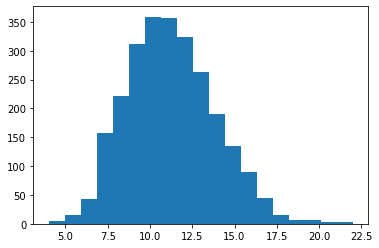

In [21]:
# CHAECKING LENGTH OF NEWS

lengths=[len(t.split(' ')) for t in NEWS]
plt.hist(lengths,bins=len(set(lengths)))
plt.show


In [22]:
maxlen = 50
def get_sequences(tokenizer,NEWS):
    sequences = tokenizer.texts_to_sequences(NEWS)
    padded= pad_sequences(sequences,truncating='post',padding='post',maxlen=maxlen)
    return padded

In [23]:
padded_train_sequences = get_sequences(tokenizer,NEWS)
padded_train_sequences

array([[  8,  12,  59, ...,   0,   0,   0],
       [ 68, 145,   3, ...,   0,   0,   0],
       [  8,   3,  26, ...,   0,   0,   0],
       ...,
       [ 33,   1, 137, ...,   0,   0,   0],
       [937, 657,   2, ...,   0,   0,   0],
       [ 68, 233, 249, ...,   0,   0,   0]])

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(1000,16,input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),# bidirectional means feed forward ,backward both
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(3,activation='softmax')# we have 3 classes that's why we put 3 ,we use softmax activation function because we want single ouput like positive or negative or neutral
])
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
# Print the summary of the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            16000     
                                                                 
 bidirectional (Bidirectiona  (None, 50, 40)           5920      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense (Dense)               (None, 3)                 123       
                                                                 
Total params: 31,803
Trainable params: 31,803
Non-trainable params: 0
_________________________________________________________________
None


In [25]:
# Train the sentiment analysis model for 5 epochs on the whole dataset with a batch size of 32 and a validation split of 20%.

history = model.fit(padded_train_sequences,encoded_sentiments[0],validation_split=0.2, epochs=10, batch_size=32)
# The python sentiment analysis model obtained 98% accuracy on the training set and 63% accuracy on the test set

Epoch 1/10
64/64 [==============================] - 8s 44ms/step - loss: 1.0894 - accuracy: 0.3917 - val_loss: 1.1340 - val_accuracy: 0.1608
Epoch 2/10
64/64 [==============================] - 1s 23ms/step - loss: 0.9706 - accuracy: 0.5088 - val_loss: 1.1425 - val_accuracy: 0.3157
Epoch 3/10
64/64 [==============================] - 2s 24ms/step - loss: 0.8231 - accuracy: 0.5922 - val_loss: 1.1954 - val_accuracy: 0.3412
Epoch 4/10
64/64 [==============================] - 2s 24ms/step - loss: 0.7312 - accuracy: 0.6662 - val_loss: 1.1690 - val_accuracy: 0.4412
Epoch 5/10
64/64 [==============================] - 2s 24ms/step - loss: 0.6403 - accuracy: 0.7270 - val_loss: 1.2979 - val_accuracy: 0.4961
Epoch 6/10
64/64 [==============================] - 2s 24ms/step - loss: 0.5420 - accuracy: 0.7902 - val_loss: 1.4194 - val_accuracy: 0.4706
Epoch 7/10
64/64 [==============================] - 2s 24ms/step - loss: 0.4660 - accuracy: 0.8294 - val_loss: 1.4578 - val_accuracy: 0.5353
Epoch 8/10
64

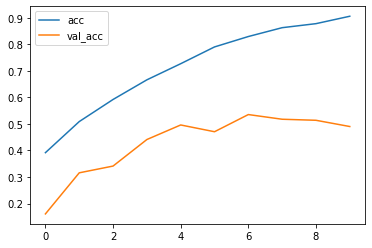

<Figure size 432x288 with 0 Axes>

In [26]:
# Let’s plot these metrics using the matplotlib.

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

plt.savefig("Accuracy plot.jpg")

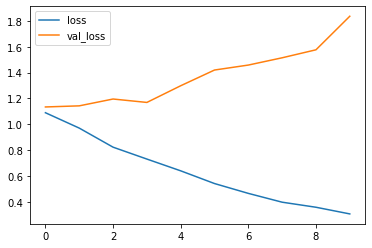

<Figure size 432x288 with 0 Axes>

In [27]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')

plt.legend()
plt.show()

plt.savefig("Loss plt.jpg")

In [28]:
def predict_sentiment(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw, maxlen=50)  # Set the sequence length to 50
    global prediction
    prediction = model.predict(np.array(tw))
    predicted_class_index = np.argmax(prediction)
    
    print("Predicted label: ", encoded_sentiments[1][predicted_class_index])
    

print(" ********** RNN *********")
test_sentence1 = "جس قسم گندے الفاظ فضلو نے دھرنے کی خواتین کے بارے میں استعمال کئے اس پر تمام سیاسی اور مزھبی جماعتوں کو انکا بائکاٹ کرنا چاہئے "
print(test_sentence1)
predict_sentiment(test_sentence1)


 ********** RNN *********
جس قسم گندے الفاظ فضلو نے دھرنے کی خواتین کے بارے میں استعمال کئے اس پر تمام سیاسی اور مزھبی جماعتوں کو انکا بائکاٹ کرنا چاہئے 
1/1 [==============================] - 1s 1s/step
Predicted label:  NEGATIVE


In [29]:
from sklearn.metrics import confusion_matrix, classification_report

# create lists to store predicted and true labels
predicted_labels = []
true_labels = []

# loop through each sentence in the test set and predict the sentiment
for sentence, label in zip(X_test, Y_test):
    predict_sentiment(sentence)
    predicted_labels.append(prediction)
    true_labels.append(label)


1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 19ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 19ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 18ms/step
Predicte

1/1 [==============================] - 0s 19ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 16ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 16ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 18ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predict

1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 16ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 17ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 19ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 15ms/step
Predicte

1/1 [==============================] - 0s 18ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 16ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 15ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 15ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 16ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 16ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 16ms/step
Predi

1/1 [==============================] - 0s 16ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 21ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 19ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 19ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 20ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 19ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 20ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 20ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 18ms/step
Predict

1/1 [==============================] - 0s 19ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 19ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 19ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 18ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 19ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 18ms/step
Predicte

1/1 [==============================] - 0s 17ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 18ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 16ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 17ms/step
Predic

1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 17ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 19ms/step
Predicted label:  POSITIVE
1/1 [==============================] - 0s 19ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 19ms/step
Predicted label:  NEGATIVE
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 18ms/step
Predicted label:  NEUTRAL
1/1 [==============================] - 0s 17ms/step
Predic

In [35]:
# Convert the lists to numpy arrays if they are not already
true_labels_arr = np.array(true_labels)
predicted_probs_arr = np.array(predicted_labels)

# Check the shape of the arrays
print("Shape of true_labels_arr:", true_labels_arr.shape)
print("Shape of predicted_probs_arr:", predicted_probs_arr.shape)

# Check the unique values in the arrays
print("Unique true labels:", np.unique(true_labels_arr))
print("Unique predicted probabilities:", np.unique(predicted_probs_arr))

# Reshape the predicted_probs_arr to a 2-dimensional array
predicted_probs_arr_2d = predicted_probs_arr[:, 0, :]

# Convert predicted probabilities to class labels
predicted_labels_class = np.argmax(predicted_probs_arr_2d, axis=1)

# Check the shape and unique values of the predicted_labels_class array
print("Shape of predicted_labels_class:", predicted_labels_class.shape)
print("Unique predicted class labels:", np.unique(predicted_labels_class))

Shape of true_labels_arr: (765,)
Shape of predicted_probs_arr: (765, 1, 3)
Unique true labels: [0 1 2]
Unique predicted probabilities: [0.00434958 0.00441077 0.00529226 ... 0.92087334 0.9266164  0.933101  ]
Shape of predicted_labels_class: (765,)
Unique predicted class labels: [0 1 2]


In [36]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming true_labels_arr and predicted_labels_class are the corrected arrays
# Create the confusion matrix
conf_matrix = confusion_matrix(true_labels_arr, predicted_labels_class, labels=[0, 1, 2])

# Create the classification report
class_report = classification_report(true_labels_arr, predicted_labels_class, target_names=['positive', 'negative', 'neutral'])

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[  3 139 111]
 [  9 164  75]
 [110 150   4]]

Classification Report:
              precision    recall  f1-score   support

    positive       0.02      0.01      0.02       253
    negative       0.36      0.66      0.47       248
     neutral       0.02      0.02      0.02       264

    accuracy                           0.22       765
   macro avg       0.14      0.23      0.17       765
weighted avg       0.13      0.22      0.16       765



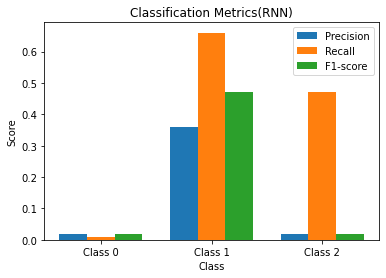

In [37]:
import matplotlib.pyplot as plt
import numpy as np

# Define the class labels
class_labels = ['Class 0', 'Class 1', 'Class 2']

# Define the precision, recall, and F1-score for each class
precision = [0.02, 0.36, 0.02]
recall = [0.01, 0.66, 0.47]
f1_score = [0.02, 0.47, 0.02]

# Define the x-axis locations for the bars
x_ticks = np.arange(len(class_labels))

# Set the bar width
bar_width = 0.25

# Plot the precision, recall, and F1-score for each class as separate bars
fig, ax = plt.subplots()
ax.bar(x_ticks - bar_width, precision, bar_width, label='Precision')
ax.bar(x_ticks, recall, bar_width, label='Recall')
ax.bar(x_ticks + bar_width, f1_score, bar_width, label='F1-score')

# Add labels, title, and legend
ax.set_xlabel('Class')
ax.set_ylabel('Score')
ax.set_title('Classification Metrics(RNN)')
ax.set_xticks(x_ticks)
ax.set_xticklabels(class_labels)
ax.legend()

# Show the plot
plt.show()

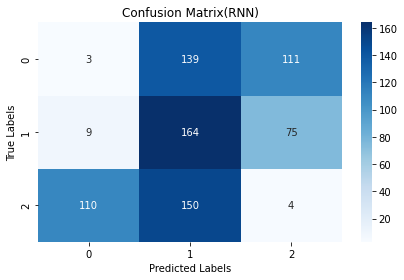

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming conf_matrix is a 2D array or a DataFrame
# You can pass conf_matrix to seaborn’s heatmap function

# Create a figure and axis
Fig, ax = plt.subplots()

# Plot the heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', ax=ax)

# Add labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix(RNN)')

# Show the plot
plt.tight_layout()
plt.show()
